<a href="https://colab.research.google.com/github/LeoVila27/Intro_Ciencia_de_Dados/blob/master/S_Recomenda%C3%A7%C3%A3o_emSala_Fundamentos2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://grouplens.org/datasets/movielens/

Este Exemplo: https://grouplens.org/datasets/movielens/10m/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gitly==1.1.4

# Importação, instanciação e instalação
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter( 'git' )

     |████████████████████████████████| 13.2MB 292kB/s 
     |████████████████████████████████| 74.6MB 70kB/s 
  Created wheel for gitly: filename=gitly-1.1.4-cp36-none-any.whl size=4522 sha256=dddbeaf18fd3e3729ee9ad34f08e475eeba33b0c73f13e239378be689d45dd7b
  Stored in directory: /root/.cache/pip/wheels/41/5c/0b/6cd3a688991c83f17c948adf0775f7907a0406d1119bd809af
Successfully built gitly
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import pandas as pd

In [4]:
df_filmes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thiago/Datasets/filmes/movies.dat', sep='::', names=['id_filmes', 'nomes', 'categorias'])
df_filmes.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,id_filmes,nomes,categorias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
df_rate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thiago/Datasets/filmes/ratings_menor.dat', sep='::', names=['id_usuario', 'id_filmes', 'nota', 'timestamp'])
df_rate.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,id_usuario,id_filmes,nota,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392


In [6]:
df_rate.id_usuario.nunique()

22230

# Estruturas

In [7]:
df_filmes.shape

(10681, 3)

In [8]:
df_rate.shape

(3153681, 4)

In [9]:
df_rate.id_filmes.value_counts()

593      10858
296      10856
356      10683
480      10063
318       9717
         ...  
6199         1
40752        1
60471        1
8120         1
34473        1
Name: id_filmes, Length: 10325, dtype: int64

In [10]:
df_rate.id_usuario.value_counts().rename('qtd_avaliadas')

14463    5169
19635    4165
3817     4165
6757     3414
19379    3202
         ... 
6688       20
10016      20
13212      20
14765      20
5887       20
Name: qtd_avaliadas, Length: 22230, dtype: int64

# Sumarização

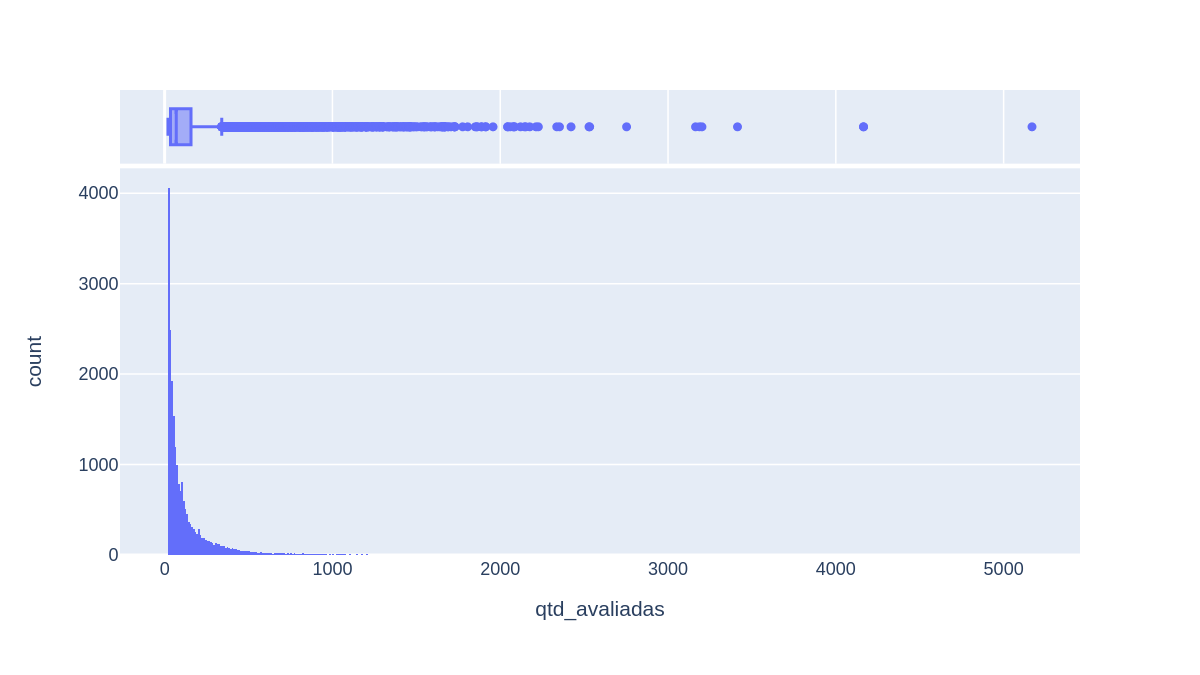

In [11]:
import plotly.express as px

df = df_rate.id_usuario.value_counts().rename('qtd_avaliadas')
fig = px.histogram(df, x='qtd_avaliadas', marginal="box")
gitly.show( fig, scale=1.5 )

# S R - Inicio

In [12]:
df_rate.head()

,id_usuario,id_filmes,nota,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [13]:
# info 1 - somatoria da nota: Boa? (Não)
df_rate.groupby('id_usuario').sum()['nota'].head(8)

id_usuario
1     110.0
2      64.0
3     130.0
4     153.0
5     335.0
6     165.0
7     428.0
8    2718.5
Name: nota, dtype: float64

In [14]:
# info 2 - média da nota: Boa? (Sim)
df_rate.groupby('id_usuario').mean()['nota'].head(8)

id_usuario
1    5.000000
2    3.200000
3    3.939394
4    4.026316
5    3.850575
6    3.928571
7    3.926606
8    3.398125
Name: nota, dtype: float64

In [15]:
df_filmes.head()

,id_filmes,nomes,categorias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
df_cat_exp = df_filmes.categorias.str.split('|', expand=True)
df_cat_exp.head(3)

,0,1,2,3,4,5,6,7
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None


In [17]:
lista_genero = list(df_cat_exp[0].unique())
lista_genero.remove('IMAX')
lista_genero.remove('(no genres listed)')
print(lista_genero)

['Adventure', 'Comedy', 'Action', 'Animation', 'Drama', 'Crime', 'Sci-Fi', 'Children', 'Documentary', 'Mystery', 'Thriller', 'Horror', 'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Musical']


In [18]:
voc_dict = {}

i=0
for gen in lista_genero:
    voc_dict[ gen.lower() ] = i
    i = i + 1
    
voc_dict

{'action': 2,
 'adventure': 0,
 'animation': 3,
 'children': 7,
 'comedy': 1,
 'crime': 5,
 'documentary': 8,
 'drama': 4,
 'fantasy': 12,
 'film-noir': 14,
 'horror': 11,
 'musical': 17,
 'mystery': 9,
 'romance': 15,
 'sci-fi': 6,
 'thriller': 10,
 'war': 16,
 'western': 13}

Usar o CountVectorizer para vetorizar o campo categoria do dataframe de filmes

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Tutorial: https://kavita-ganesan.com/how-to-use-countvectorizer/#Example-of-How-CountVectorizer-Works

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer(  analyzer='word', vocabulary= voc_dict, ngram_range=(1,2), token_pattern = '[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+' )
# Treinando o vetorizador
vetorizador.fit( lista_genero )

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+',
                tokenizer=None,
                vocabulary={'action': 2, 'adventure': 0, 'animation': 3,
                            'children': 7, 'comedy': 1, 'crime': 5,
                            'documentary': 8, 'drama': 4, 'fantasy': 12,
                            'film-noir': 14, 'horror': 11, 'musical': 17,
                            'mystery': 9, 'romance': 15, 'sci-fi': 6,
                            'thriller': 10, 'war': 16, 'western': 13})

In [20]:
# Testando o vetorizador
matriz_cat_exemplo = vetorizador.transform(['Action|Crime|Thriller'])
matriz_cat_exemplo.todense()

matrix([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [21]:
matriz_cat = vetorizador.transform( df_filmes.categorias )
matriz_cat.todense()[:5,:]

matrix([[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [22]:
df_filmes_cat_exp = pd.DataFrame(data=matriz_cat.todense(), columns=vetorizador.get_feature_names() )
df_filmes_cat_exp.head()

,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df_filmes_cat = pd.merge( df_filmes, df_filmes_cat_exp, how='left', left_index=True, right_index=True )
df_filmes_cat.head()

,id_filmes,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_cat_exp = pd.merge( df_rate, df_filmes_cat, how='left', on='id_filmes' )
df_cat_exp.head(5)

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,231,5.0,838983392,Dumb & Dumber (1994),Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Modelagem

Como definiremos gosto?



### Alternativa 1: somatório (NÃO usaremos)

In [25]:
df_cat_exp.groupby( by='id_usuario' ).sum().head()

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,9057,110.0,18457649035,6,11,10,4,6,2,5,7,0,0,5,0,2,0,0,5,2,3
2,15711,64.0,17364906892,10,4,14,0,7,1,6,1,0,1,7,1,1,1,0,4,3,1
3,179578,130.0,37626818010,6,11,7,2,20,3,0,2,0,4,6,0,3,3,1,12,6,1
4,13501,153.0,32087840561,13,19,17,3,14,5,8,5,0,0,11,1,5,3,0,8,3,3
5,56883,335.0,74638384961,8,29,5,1,64,11,8,4,0,4,14,6,4,0,1,26,6,4


## Alternativa 2: média (NÃO usaremos)

In [26]:
df_mean = df_cat_exp.groupby( by='id_usuario' ).mean()
df_mean.head()

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,411.681818,5.000000,8.389840e+08,0.272727,0.500000,0.454545,0.181818,0.272727,0.090909,0.227273,0.318182,0.0,0.000000,0.227273,0.000000,0.090909,0.000000,0.000000,0.227273,0.090909,0.136364
2,785.550000,3.200000,8.682453e+08,0.500000,0.200000,0.700000,0.000000,0.350000,0.050000,0.300000,0.050000,0.0,0.050000,0.350000,0.050000,0.050000,0.050000,0.000000,0.200000,0.150000,0.050000
3,5441.757576,3.939394,1.140207e+09,0.181818,0.333333,0.212121,0.060606,0.606061,0.090909,0.000000,0.060606,0.0,0.121212,0.181818,0.000000,0.090909,0.090909,0.030303,0.363636,0.181818,0.030303
4,355.289474,4.026316,8.444169e+08,0.342105,0.500000,0.447368,0.078947,0.368421,0.131579,0.210526,0.131579,0.0,0.000000,0.289474,0.026316,0.131579,0.078947,0.000000,0.210526,0.078947,0.078947
5,653.827586,3.850575,8.579125e+08,0.091954,0.333333,0.057471,0.011494,0.735632,0.126437,0.091954,0.045977,0.0,0.045977,0.160920,0.068966,0.045977,0.000000,0.011494,0.298851,0.068966,0.045977


## Alternativa 3:

(Avaliação * Categorias) . mean

In [27]:
df_cat_exp.head(2)

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Multiplicar as categorias pela nota
df_cat_exp.iloc[:,6:] = df_cat_exp.iloc[:,6:].multiply( df_cat_exp.nota, axis='index' )

In [29]:
df_cat_exp.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,231,5.0,838983392,Dumb & Dumber (1994),Comedy,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Agrupar utilizando média
df_mean = df_cat_exp.groupby( by='id_usuario' ).mean()
df_mean.head()

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,411.681818,5.000000,8.389840e+08,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.000000,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,785.550000,3.200000,8.682453e+08,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.150000,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,5441.757576,3.939394,1.140207e+09,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.000000,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909
4,355.289474,4.026316,8.444169e+08,1.447368,1.842105,1.763158,0.394737,1.684211,0.552632,0.894737,0.657895,0.0,0.000000,1.131579,0.078947,0.605263,0.342105,0.000000,0.789474,0.394737,0.394737
5,653.827586,3.850575,8.579125e+08,0.275862,1.195402,0.103448,0.011494,2.942529,0.540230,0.310345,0.149425,0.0,0.195402,0.643678,0.298851,0.172414,0.000000,0.057471,1.126437,0.275862,0.172414


In [31]:
df_features = df_mean.drop( labels=['id_filmes', 'timestamp'], axis='columns' )
df_features.head()

,nota,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,
1,5.000000,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.000000,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,3.200000,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.150000,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,3.939394,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.000000,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909
4,4.026316,1.447368,1.842105,1.763158,0.394737,1.684211,0.552632,0.894737,0.657895,0.0,0.000000,1.131579,0.078947,0.605263,0.342105,0.000000,0.789474,0.394737,0.394737
5,3.850575,0.275862,1.195402,0.103448,0.011494,2.942529,0.540230,0.310345,0.149425,0.0,0.195402,0.643678,0.298851,0.172414,0.000000,0.057471,1.126437,0.275862,0.172414


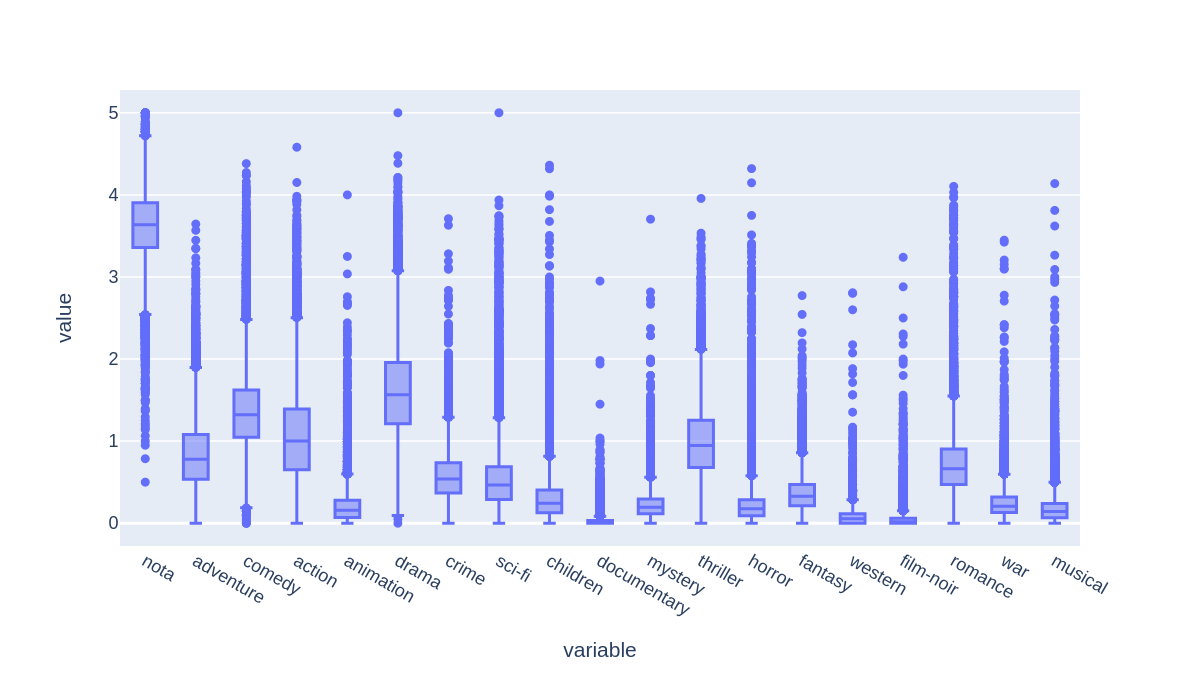

In [32]:
import plotly.express as px


fig = px.box(df_features)
gitly.show( fig, scale = 1.5 )

# Clusterização (Kmeans)

In [33]:
# n_clusters?
from sklearn.cluster import KMeans

n_kmax = 10
lista_inercia = []
for i in range(1, n_kmax):
    km = KMeans( n_clusters = i, init = 'random', n_init = 3, max_iter = 150, random_state=0 )
    km.fit( df_features )
    lista_inercia.append( km.inertia_ )


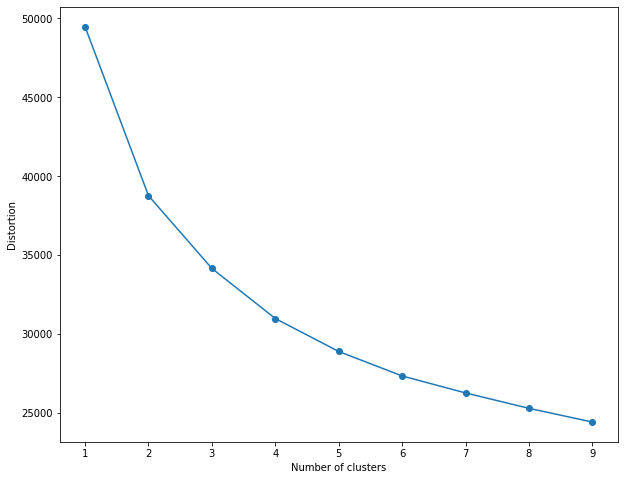

In [34]:
import matplotlib.pyplot as plt

# plot
plt.figure( figsize=(10,8) )
plt.plot(range(1, n_kmax), lista_inercia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Kmeans k=4

In [35]:
k = 4
km = KMeans( n_clusters = k, init = 'random', n_init = 10, max_iter = 150, random_state=0 )
km.fit( df_features )

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=150, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [36]:
km.predict( df_features.head() )

array([0, 2, 3, 2, 3], dtype=int32)

In [37]:
teste = df_features.iloc[1,:] # usuario exemplo
teste

nota           3.20
adventure      1.70
comedy         0.60
action         2.30
animation      0.00
drama          1.15
crime          0.10
sci-fi         1.05
children       0.15
documentary    0.00
mystery        0.10
thriller       1.00
horror         0.15
fantasy        0.15
western        0.25
film-noir      0.00
romance        0.55
war            0.55
musical        0.15
Name: 2, dtype: float64

In [38]:
km.predict( [teste] )

array([2], dtype=int32)

### Armazenando o agrupamento de cada usuário

In [39]:
y_cluster = km.predict( df_features )
y_cluster

array([0, 2, 3, ..., 1, 1, 0], dtype=int32)

In [40]:
len(y_cluster)

22230

In [41]:
df_cluster = pd.DataFrame( data=y_cluster, columns=['grupo'], index= df_features.index  )
df_cluster.head()

,grupo
id_usuario,
1,0
2,2
3,3
4,2
5,3


In [42]:
df_grupos = pd.merge( df_cluster, df_features, how='left', left_index = True, right_index=True )
df_grupos.head()

,grupo,nota,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,
1,0,5.000000,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.000000,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,2,3.200000,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.150000,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,3,3.939394,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.000000,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909
4,2,4.026316,1.447368,1.842105,1.763158,0.394737,1.684211,0.552632,0.894737,0.657895,0.0,0.000000,1.131579,0.078947,0.605263,0.342105,0.000000,0.789474,0.394737,0.394737
5,3,3.850575,0.275862,1.195402,0.103448,0.011494,2.942529,0.540230,0.310345,0.149425,0.0,0.195402,0.643678,0.298851,0.172414,0.000000,0.057471,1.126437,0.275862,0.172414


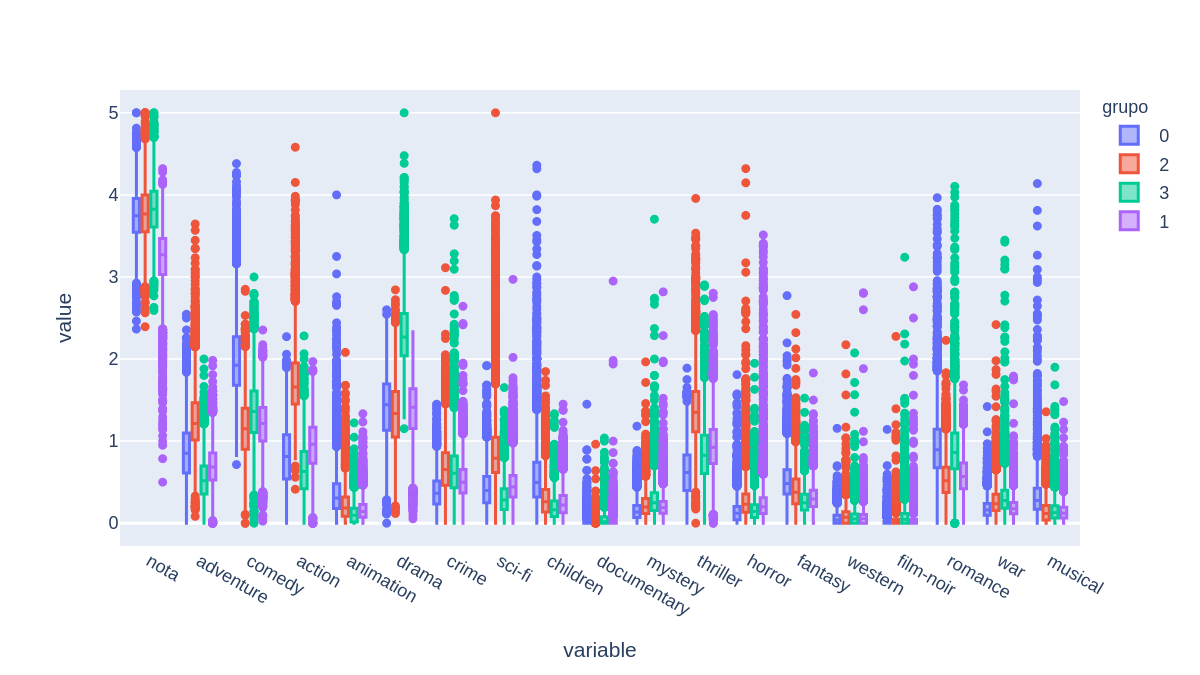

In [43]:
fig = px.box(df_grupos, color='grupo')
gitly.show( fig, scale = 1.5 )

In [44]:
df_rate_grupo = pd.merge( df_rate, df_cluster, how='left', left_on='id_usuario', right_index=True )
df_rate_grupo.head()

,id_usuario,id_filmes,nota,timestamp,grupo
0,1,122,5.0,838985046,0
1,1,185,5.0,838983525,0
2,1,231,5.0,838983392,0
3,1,292,5.0,838983421,0
4,1,316,5.0,838983392,0


In [45]:
df_rate_grupo.tail()

,id_usuario,id_filmes,nota,timestamp,grupo
3153676,22815,49272,3.0,1179937221,0
3153677,22815,49274,4.5,1170442231,0
3153678,22815,49286,4.0,1170359249,0
3153679,22815,50158,3.0,1170362089,0
3153680,22815,51662,3.5,1174575091,0


In [46]:

dict_agrupamento = {}
for i in range(0,k):
    dict_agrupamento[i] = df_rate_grupo[ df_rate_grupo['grupo'] == i ]
    print(dict_agrupamento[i].head(3))


   id_usuario  id_filmes  nota  timestamp  grupo
0           1        122   5.0  838985046      0
1           1        185   5.0  838983525      0
2           1        231   5.0  838983392      0
     id_usuario  id_filmes  nota   timestamp  grupo
242           7         32   4.0  1049820474      1
243           7         50   4.0  1050329529      1
244           7        101   4.5  1054292314      1
    id_usuario  id_filmes  nota  timestamp  grupo
22           2        110   5.0  868245777      2
23           2        151   3.0  868246450      2
24           2        260   5.0  868244562      2
    id_usuario  id_filmes  nota   timestamp  grupo
42           3        110   4.5  1136075500      3
43           3        151   4.5  1133571026      3
44           3        213   5.0  1136075789      3


In [47]:
n_minimo = 500

In [48]:
# Lista de filmes assistidos mais de n_minimo vezes
df_temp = dict_agrupamento[0].id_filmes.value_counts()
lista_filmes_minimo = list( df_temp[ df_temp.gt(n_minimo)].index )
print(lista_filmes_minimo)


[1, 356, 588, 364, 595, 480, 260, 1270, 1073, 34, 1197, 1210, 500, 1265, 597, 780, 539, 593, 296, 1196, 39, 1580, 150, 2858, 1136, 318, 367, 1198, 592, 1097, 344, 2396, 2355, 586, 2571, 357, 3114, 590, 457, 380, 2716, 587, 594, 1307, 919, 736, 527, 589, 4306, 141, 377, 648, 110, 2683, 2918, 608, 339, 2081, 1721, 1923, 1517, 231, 2762, 1028, 1968, 2628, 2987, 1784, 17, 317, 2797, 2706, 708, 440, 2174, 551, 104, 1079, 62, 1291, 2, 1380, 2997, 4886, 11, 4993, 32, 1259, 48, 1393, 223, 1220, 2054, 2791, 153, 788, 497, 50, 2028, 1777, 1080, 2502, 783, 1148, 1035, 5952, 6377, 5, 2291, 596, 1485, 733, 7, 2080, 3751, 1641, 912, 1288, 410, 1240, 21, 858, 19, 1704, 2302, 2700, 661, 2321, 2011, 1394, 3996, 3793, 329, 2959, 3, 2406, 2100, 3578, 1682, 1961, 2012, 6539, 1022, 1282, 47, 2804, 1246, 1278, 2324, 316, 1101, 2078, 2671, 368, 520, 4896, 5349, 4973, 7153, 543, 4963, 3253, 1036, 2599, 1500, 10, 158, 1193, 1527, 3052, 2115, 2657, 3897, 1356, 745, 3481]


In [49]:
# filtrando e deixando apenas filmes assistidos mais de n_minimo vezes
dict_agrupamento[0] = dict_agrupamento[0][ dict_agrupamento[0].id_filmes.isin(lista_filmes_minimo) ]

In [50]:
df_sug = {}
df_sug[0] = dict_agrupamento[0].groupby( by='id_filmes' ).mean().sort_values(by='nota', ascending=False).head(200)
df_sug[0].head(2)

,id_usuario,nota,timestamp,grupo
id_filmes,,,,
318,11402.576670,4.531044,1.014145e+09,0
527,11157.389849,4.485421,9.946988e+08,0


In [51]:
df_final = {}
df_final[0] = pd.merge( df_sug[0][['nota', 'grupo']], df_filmes, how='left', left_index=True, right_on='id_filmes' )
df_final[0].head(10)

,nota,grupo,id_filmes,nomes,categorias
315,4.531044,0,318,"Shawshank Redemption, The (1994)",Drama
523,4.485421,0,527,Schindler's List (1993),Drama|War
732,4.481151,0,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
49,4.456652,0,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4879,4.436433,0,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
1125,4.428244,0,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
2240,4.426063,0,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
895,4.375000,0,912,Casablanca (1942),Drama|Romance
1172,4.368093,0,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
1113,4.357944,0,1136,Monty Python and the Holy Grail (1975),Comedy


# Criando um for para automatizar

In [52]:
n_minimo_for = 500
n_top = 200
df_sug = {}
df_final = {}
for i in range(0,k):
    # Lista de filmes assistidos mais de n_minimo vezes
    df_temp = dict_agrupamento[i].id_filmes.value_counts()
    lista_filmes_minimo = list( df_temp[ df_temp.gt(n_minimo_for)].index )
    
    # filtrando e deixando apenas filmes assistidos mais de n_minimo vezes
    dict_agrupamento[i] = dict_agrupamento[i][ dict_agrupamento[i].id_filmes.isin(lista_filmes_minimo) ]
    df_sug[i] = dict_agrupamento[i].groupby( by='id_filmes' ).mean().sort_values(by='nota', ascending=False).head(n_top)

    df_final[i] = pd.merge( df_sug[i][['nota', 'grupo']], df_filmes, how='left', left_index=True, right_on='id_filmes' )
    print(df_final[i][['nota', 'nomes']].head(7))

          nota                                              nomes
315   4.531044                   Shawshank Redemption, The (1994)
523   4.485421                            Schindler's List (1993)
732   4.481151             Wallace & Gromit: A Close Shave (1995)
49    4.456652                         Usual Suspects, The (1995)
4879  4.436433  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...
1125  4.428244        Wallace & Gromit: The Wrong Trousers (1993)
2240  4.426063         Life Is Beautiful (La Vita è bella) (1997)
          nota                                              nomes
315   4.312822                   Shawshank Redemption, The (1994)
843   4.264250                              Godfather, The (1972)
49    4.241181                         Usual Suspects, The (1995)
523   4.171766                            Schindler's List (1993)
1195  4.146421                     Godfather: Part II, The (1974)
1935  4.108527        Seven Samurai (Shichinin no samurai) (1954)
737   4.10

# Como faço uma sugestão?


In [53]:
indice_usuario_x = 215

df_usuario_x = df_rate[ df_rate['id_usuario'] == indice_usuario_x ]
df_usuario_x.head()

,id_usuario,id_filmes,nota,timestamp
27868,215,1,5.0,949015769
27869,215,2,4.0,949008881
27870,215,6,5.0,948259719
27871,215,10,4.0,949008811
27872,215,11,4.0,949016452


In [54]:
df_pre_sug = pd.merge( df_usuario_x, df_filmes_cat, how='left', left_on='id_filmes', right_on='id_filmes' )
df_pre_sug.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,215,1,5.0,949015769,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,215,2,4.0,949008881,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,215,6,5.0,948259719,Heat (1995),Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,215,10,4.0,949008811,GoldenEye (1995),Action|Adventure|Thriller,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,215,11,4.0,949016452,"American President, The (1995)",Comedy|Drama|Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
df_pre_sug.iloc[:,6:] = df_pre_sug.iloc[:,6:].multiply( df_pre_sug.nota, axis='index' )
df_pre_sug.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,215,1,5.0,949015769,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,215,2,4.0,949008881,Jumanji (1995),Adventure|Children|Fantasy,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,215,6,5.0,948259719,Heat (1995),Action|Crime|Thriller,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215,10,4.0,949008811,GoldenEye (1995),Action|Adventure|Thriller,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215,11,4.0,949016452,"American President, The (1995)",Comedy|Drama|Romance,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [56]:
df_pre_sug.drop(labels=['id_usuario', 'id_filmes', 'timestamp'], inplace=True, axis='columns')
df_feature_usuario_x = df_pre_sug.mean()
df_feature_usuario_x

nota           4.165862
adventure      0.774155
comedy         1.550725
action         1.260467
animation      0.175926
drama          2.053945
crime          0.932770
sci-fi         0.562399
children       0.194444
documentary    0.070048
mystery        0.360709
thriller       1.187198
horror         0.311997
fantasy        0.370370
western        0.126006
film-noir      0.150161
romance        0.627617
war            0.214976
musical        0.134461
dtype: float64

In [57]:
df_feature_usuario_x.values

array([4.16586151, 0.77415459, 1.55072464, 1.26046699, 0.17592593,
       2.05394525, 0.93276973, 0.56239936, 0.19444444, 0.07004831,
       0.36070853, 1.18719807, 0.31199678, 0.37037037, 0.12600644,
       0.15016103, 0.62761675, 0.21497585, 0.13446055])

In [58]:
# descobri qual é o grupo
grupo_usuario_x = km.predict( [df_feature_usuario_x.values] )[0]
print(grupo_usuario_x)

3


In [59]:
# oq o usuario já assistiu?
lista_assistidos = list(df_usuario_x.id_filmes.values)
print(lista_assistidos)


[1, 2, 6, 10, 11, 15, 16, 17, 21, 22, 25, 26, 29, 32, 34, 36, 39, 41, 44, 47, 49, 50, 52, 59, 65, 70, 76, 81, 93, 94, 95, 110, 111, 112, 122, 125, 141, 149, 150, 151, 153, 156, 159, 160, 161, 162, 163, 164, 165, 172, 173, 176, 183, 194, 198, 203, 204, 208, 210, 223, 224, 229, 234, 235, 236, 247, 252, 256, 259, 260, 266, 268, 288, 292, 293, 296, 300, 303, 305, 316, 317, 318, 319, 322, 327, 329, 334, 335, 339, 341, 344, 345, 348, 349, 350, 353, 356, 357, 364, 367, 368, 369, 373, 376, 377, 379, 380, 410, 412, 415, 420, 431, 434, 442, 444, 448, 454, 456, 457, 464, 466, 471, 474, 475, 477, 479, 480, 482, 485, 491, 492, 494, 496, 497, 500, 501, 503, 504, 506, 507, 508, 512, 514, 517, 521, 529, 532, 535, 538, 541, 546, 551, 552, 553, 555, 562, 583, 586, 587, 588, 589, 592, 593, 595, 597, 599, 608, 610, 628, 648, 661, 663, 664, 671, 673, 695, 707, 708, 714, 719, 720, 733, 736, 737, 741, 745, 750, 757, 761, 762, 766, 778, 780, 784, 786, 788, 798, 799, 800, 806, 838, 846, 849, 851, 852, 858, 861

In [60]:
#filtro para o que não assistiu
~(df_final[ grupo_usuario_x ].id_filmes.isin( lista_assistidos ))

843     False
315     False
1181    False
523      True
895     False
        ...  
269      True
588      True
1580    False
2159    False
0       False
Name: id_filmes, Length: 200, dtype: bool

In [61]:
sugestao = df_final[ grupo_usuario_x ][ ~(df_final[ grupo_usuario_x ].id_filmes.isin( lista_assistidos )) ]
sugestao[['nota','id_filmes','nomes','categorias']].head(10)


,nota,id_filmes,nomes,categorias
523,4.495612,527,Schindler's List (1993),Drama|War
1861,4.400000,1945,On the Waterfront (1954),Crime|Drama
1270,4.347682,1299,"Killing Fields, The (1984)",Drama|War
952,4.329747,969,"African Queen, The (1951)",Adventure|Comedy|Romance|War
1082,4.325123,1104,"Streetcar Named Desire, A (1951)",Drama
243,4.295504,246,Hoop Dreams (1994),Documentary
303,4.284759,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
1265,4.283767,1293,Gandhi (1982),Drama
1216,4.276382,1244,Manhattan (1979),Comedy|Drama|Romance
882,4.267459,899,Singin' in the Rain (1952),Comedy|Musical|Romance


# Preparando para Deploy

Salvando os top 200 filmes de cada grupo em um arquivo CSV

In [63]:
path_deploy = '/content/drive/MyDrive/Colab Notebooks/Thiago/Sistema_Recomendacao'
for i in range(0,k):
    nome_completo = path_deploy + '/' + 'tabela_top_grupo_' + str(i) + '.csv'
    df_final[i].to_csv(nome_completo)

Salvar o modelo Kmeans

Tutorial: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [64]:
from joblib import dump

arquivo_modelo = path_deploy + '/' + 'modelo_kmeans.joblib'
dump( km, arquivo_modelo )


['/content/drive/MyDrive/Colab Notebooks/Thiago/Sistema_Recomendacao/modelo_kmeans.joblib']

In [65]:
km.cluster_centers_

array([[3.74550559, 0.87537683, 2.03337682, 0.81327398, 0.38319687,
        1.40041646, 0.38584193, 0.43169616, 0.59410901, 0.02572085,
        0.15537798, 0.62447914, 0.15083052, 0.52775884, 0.0645129 ,
        0.02472721, 0.96025148, 0.18108856, 0.34425202],
       [3.2131007 , 0.69137936, 1.19742722, 0.94167489, 0.16400366,
        1.37961448, 0.52254152, 0.46449612, 0.24815513, 0.02728263,
        0.20766761, 0.93979424, 0.26790743, 0.31284299, 0.0731184 ,
        0.03800552, 0.58265333, 0.19424966, 0.14070277],
       [3.77272925, 1.26551973, 1.15187309, 1.75343542, 0.22399633,
        1.33009887, 0.67384711, 0.91197237, 0.29879407, 0.0116481 ,
        0.22010184, 1.38510731, 0.2752915 , 0.40772525, 0.09300149,
        0.0356167 , 0.54525806, 0.26652688, 0.14609348],
       [3.83241562, 0.5349186 , 1.36396059, 0.66311245, 0.12218059,
        2.34245385, 0.65402633, 0.31068239, 0.19249104, 0.0530169 ,
        0.28441276, 0.85733967, 0.16569759, 0.26631133, 0.07507136,
        0.086